# Exploratory study on ML algorithms
Exploratory study on ML algorithms is a notebook from kaggle by Santhosh Sharma, it can be accessed from [Here](https://www.kaggle.com/sharmasanthosh/exploratory-study-on-ml-algorithms). I have used the original notebook to create this one as I was learning and practicing to machine learning processes in solving practical predictive problems.

### Data Statistics

- Shape
- Peek
- Skew

### Tramsformation

- Correction of skew

### Data Interaction

- Correlation
- Scatter plot

### Data Visualisation

- Box and density plots
- Grouping of one hot encoded attributes

### Data Preparation

- One hot encoding of categorical data
- Test-train split

### Evaluation, prediction, and analysis

- Linear Regression (Linear algo)
- Ridge Regression (Linear algo)
- LASSO Linear Regression (Linear algo)
- Elastic Net Regression (Linear algo)
- KNN (Non-linear algo)
- CART (Non-linear algo)
- SVM (Non-linear algo)
- Bagged Decision Trees (Bagging)
- Random Forest (Bagging)
- Extra Trees (Bagging)
- AdaBoost (Boosting)
- Stochastic Gradient Boosting (Boosting)
- MLP (Deep Learning)
- XGBoost

### Make Predictions


#### Load Raw Data:



In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

train_data_filepath = 'train.csv'
test_data_filepath = 'test.csv'

train_data = pd.read_csv(train_data_filepath)
test_data = pd.read_csv(test_data_filepath)

In [2]:
#Display data

print('\nThe first 5 lines of training data\n\n {} \nThe first 5 lines of testing data\n\n {} '.format(train_data.head(5), test_data.head(5)))


The first 5 lines of training data

    id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 row

In [3]:
#Save the id column 
ID = test_data['id']

#drop id column, its only used for indexing it 
# has no useful meaning on prediction

# check pandas drop method 'what is axis?'
test_data.drop('id', axis=1, inplace=True)

In [4]:
#set pandas to display all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_column', None)

In [5]:
train_data.drop('id', axis=1, inplace=True)

In [6]:
print('The first 5 lines of training data \n\n{}'.format(train_data.head(5)))

The first 5 lines of training data 

  cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13 cat14  \
0    A    B    A    B    A    A    A    A    B     A     B     A     A     A   
1    A    B    A    A    A    A    A    A    B     B     A     A     A     A   
2    A    B    A    A    B    A    A    A    B     B     B     B     B     A   
3    B    B    A    B    A    A    A    A    B     A     A     A     A     A   
4    A    B    A    B    A    A    A    A    B     B     A     B     A     A   

  cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25 cat26  \
0     A     A     A     A     A     A     A     A     B     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     B     A     A     A   
4     A     A     A     A     A     A     A     A     B     A     A     A   

  cat27 cat28 cat29

In [7]:
# It can be seen that the id's column has been removed

#### Data Statistics
- shape

In [8]:
# Printing the size of the dataframe

print('Trainig dataset shape ')
print(train_data.shape)
print('Testing dataset shape')
print(test_data.shape)

Trainig dataset shape 
(188318, 131)
Testing dataset shape
(125546, 130)


In [9]:
print(test_data.head(5))

  cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13 cat14  \
0    A    B    A    A    A    A    A    A    B     A     B     A     A     A   
1    A    B    A    B    A    A    A    A    B     A     A     A     A     A   
2    A    B    A    B    B    A    B    A    B     B     A     B     B     B   
3    A    A    A    A    B    A    A    A    A     A     A     A     A     A   
4    B    A    A    A    A    B    A    A    A     A     A     A     A     A   

  cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25 cat26  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     B     B     A     A   
2     A     A     A     A     A     A     A     A     B     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 

Test dataset does not have loss column (the variable we are predicting)

#### Data Statistics
- Description

In [10]:
print(train_data.describe())

               cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.3361

In [11]:
# looking at the count row each column has same count meaning no missing values
# No negative values in dataset

#### Data Statistics
- Skew


In [12]:
print(train_data.skew())

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


#### Data Visualisation
- Box and density plots

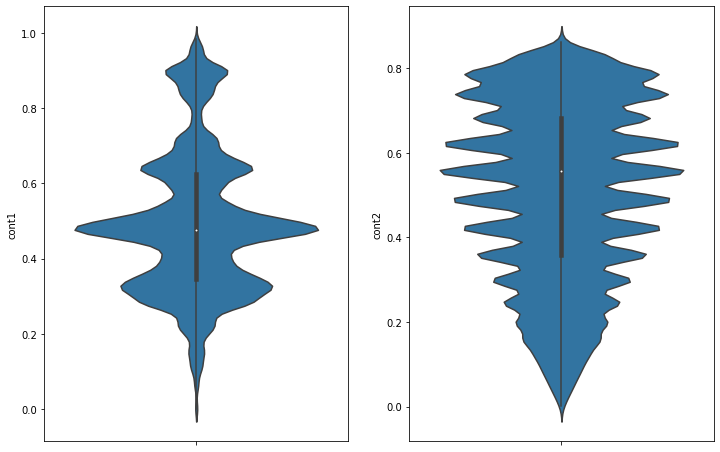

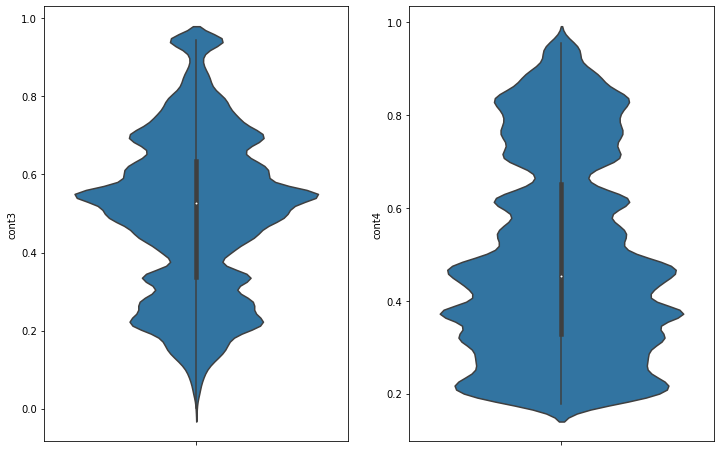

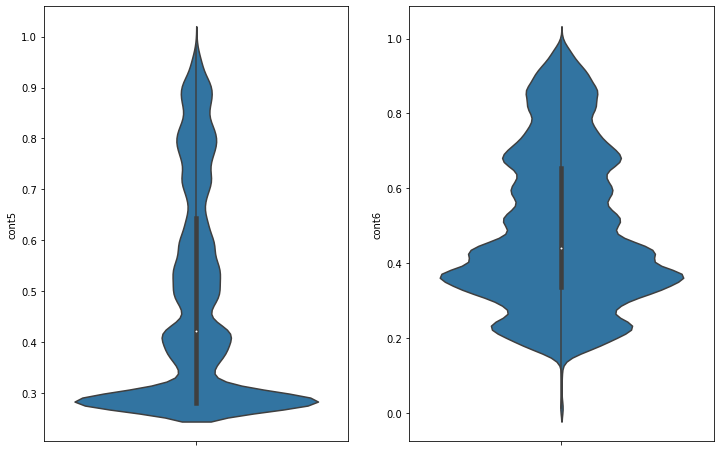

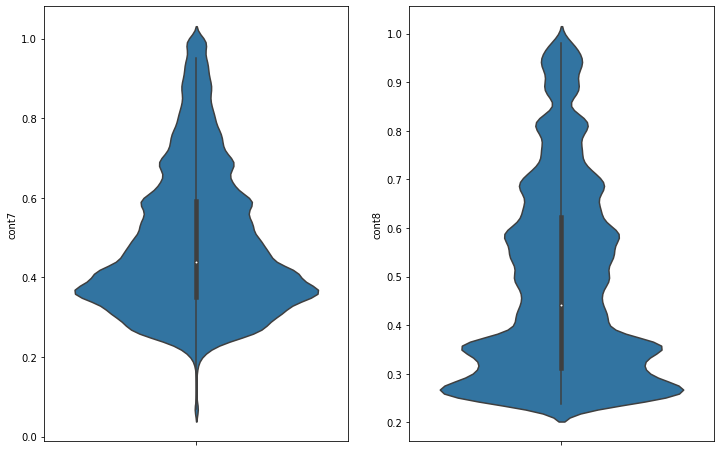

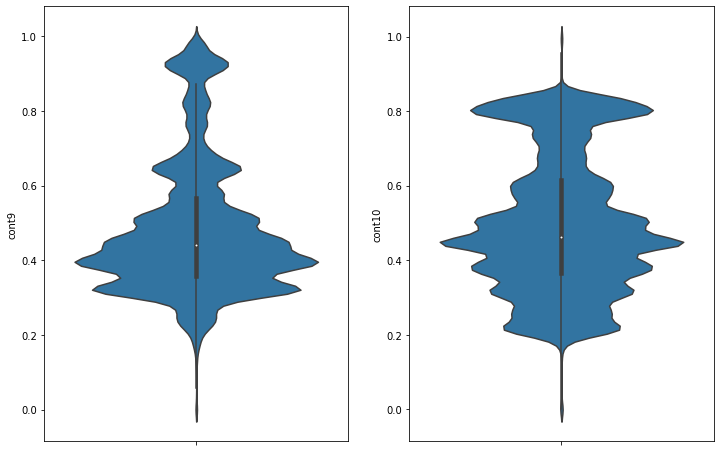

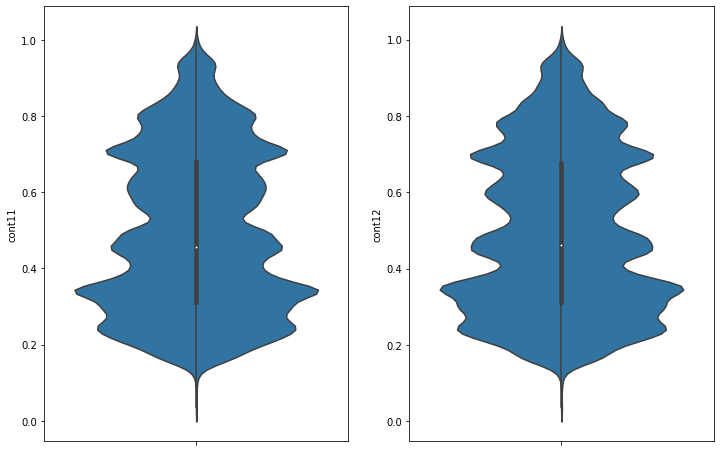

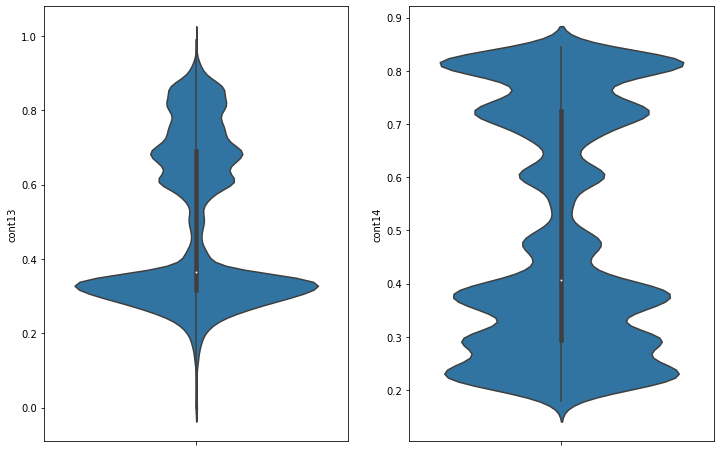

In [14]:
# We will visualize all the continuous attributes using Violin Plot - a combination of box and density plots
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt

# range of features considered
split = 116

# number of features considered
size = 15

# dataframe with only continuous feautures
# all rows will be included and all columns from 116 
# split to the end
cont_data = train_data.iloc[:,split:]

# list of all columns names
cont_cols = cont_data.columns

# Plot violin for all continuous variables
# (14 of them) in a 7x2 grid

n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(12,8))
    for j in range(n_cols):
        sns.violinplot(y=cont_cols[i * n_cols + j], data=cont_data,ax=ax[j])
        
        

#### Data Transformation
- Skew correction

In [15]:
cont_cols

Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss'],
      dtype='object')

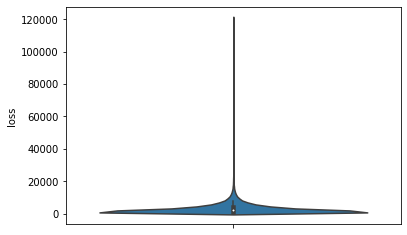

In [17]:
sns.violinplot(data=train_data, y="loss")


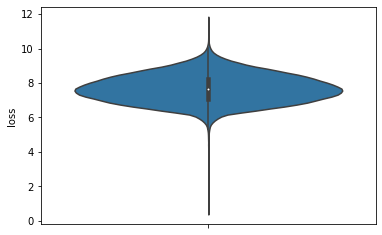

In [18]:
# looking the loos violinplot, loss is very skewed
train_data["loss"] = numpy.log1p(train_data['loss'])

sns.violinplot(data=train_data, y='loss')
plt.show()

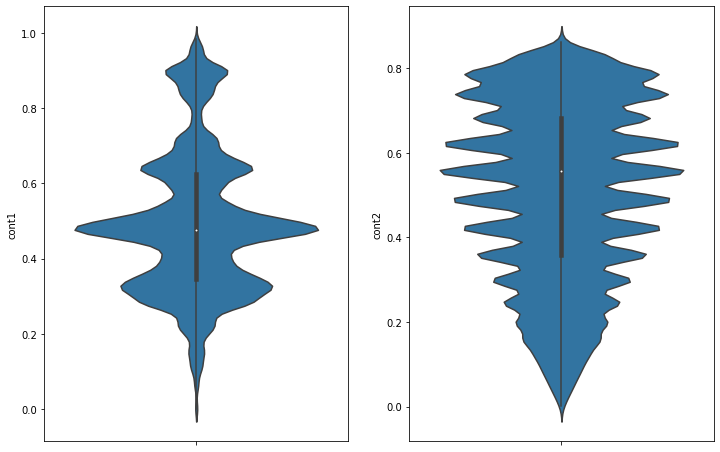

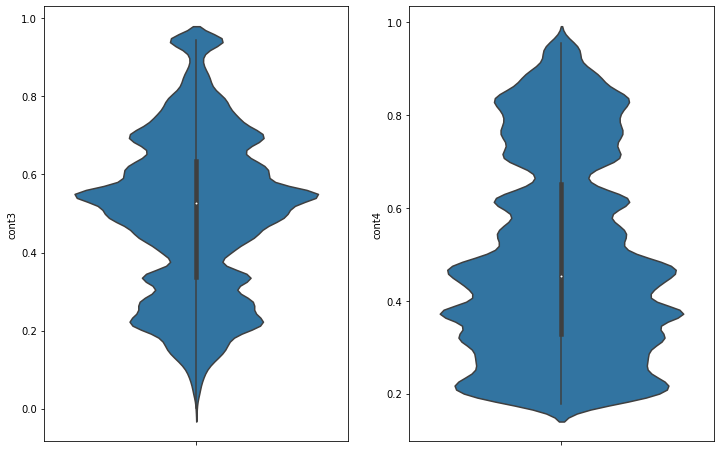

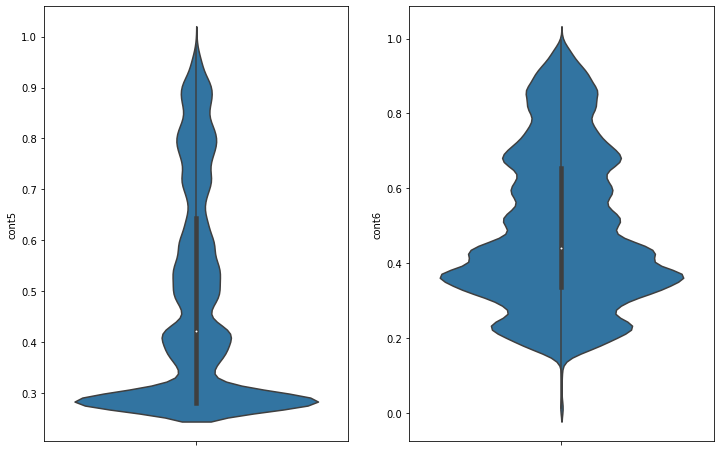

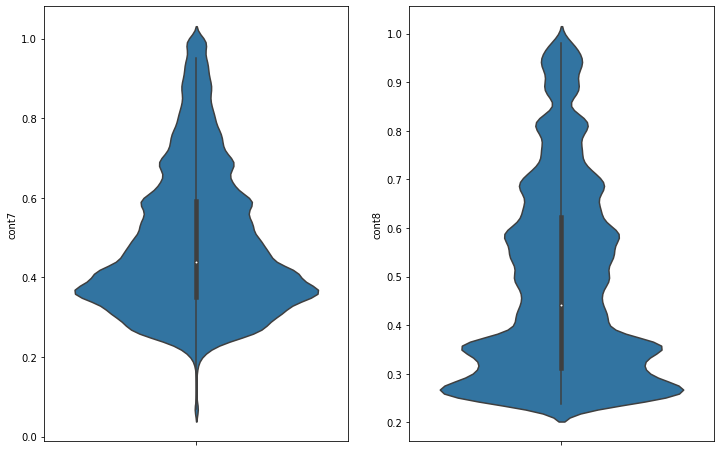

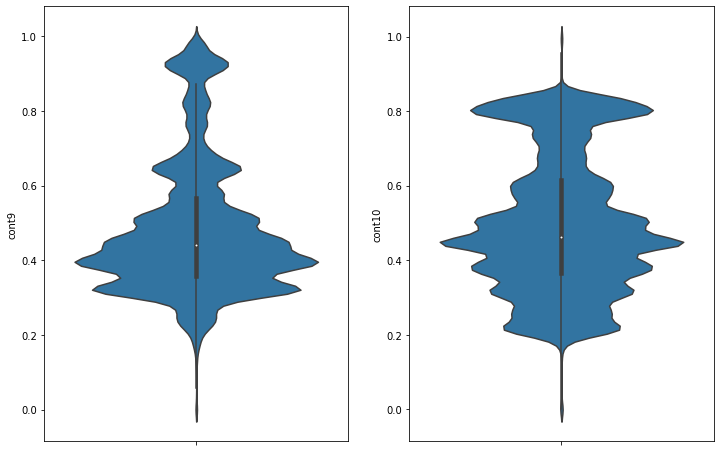

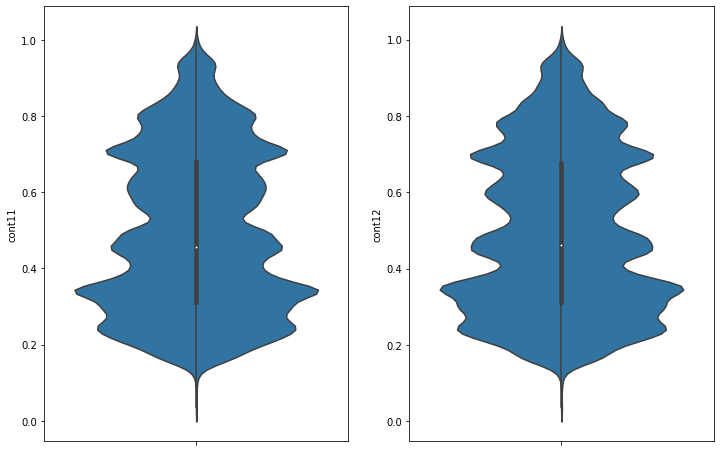

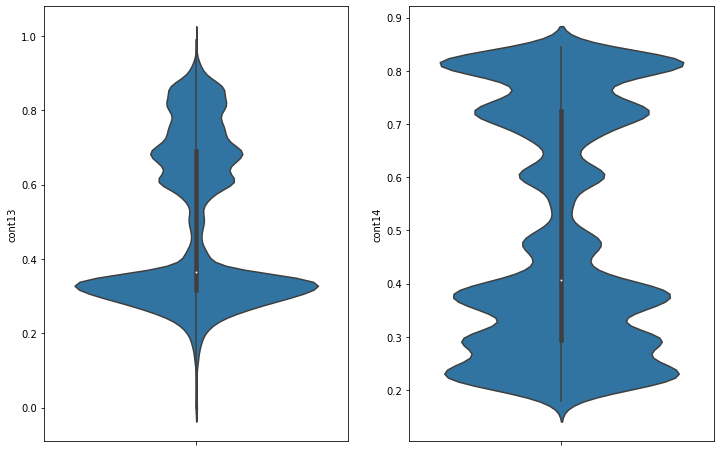

In [19]:
# Reploting again to see changes
# range of features considered
split = 116

# number of features considered
size = 15

# dataframe with only continuous feautures
# all rows will be included and all columns from 116 
# split to the end
cont_data = train_data.iloc[:,split:]

# list of all columns names
cont_cols = cont_data.columns

# Plot violin for all continuous variables
# (14 of them) in a 7x2 grid

n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(12,8))
    for j in range(n_cols):
        sns.violinplot(y=cont_cols[i * n_cols + j], data=cont_data,ax=ax[j])
        

#### Data Interaction
- Correlation

In [22]:
data_corr = train_data.corr()

threshold = 0.5
corr_list = []


# searching for highly correlated pairs

for i in range(0, size): # for 'size' features
    for j in range(i + 1, size):
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (
                data_corr.iloc[i,j] <= -threshold and data_corr.iloc[i,j] < 0):
            corr_list.append([data_corr.iloc[i,j], i, j])
        
# sorted correlated values from high to low
s_corr_list = sorted(corr_list, key=lambda x: -abs(x[0]))

for v,i,j in s_corr_list:
    print("%s and %s = %.2f" %(cont_cols[i],cont_cols[j], v))

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


#### Data Interaction
- Scatter plot

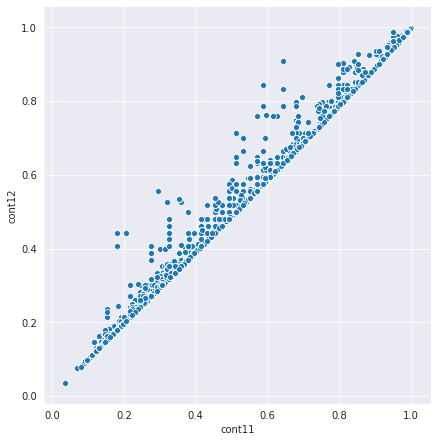

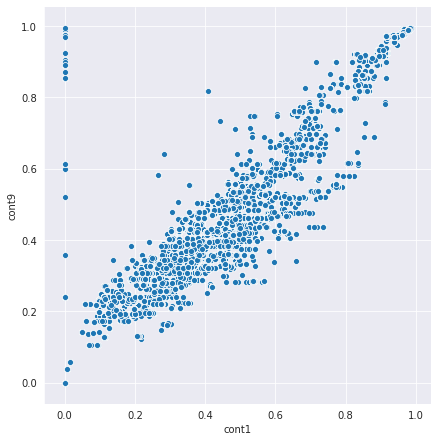

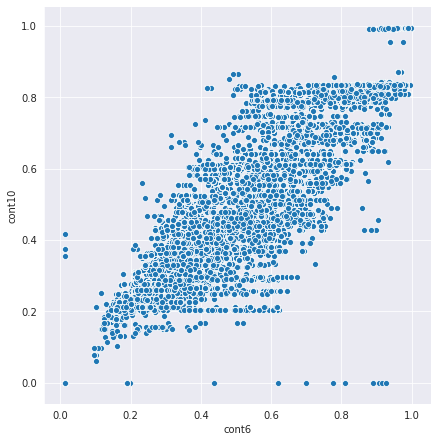

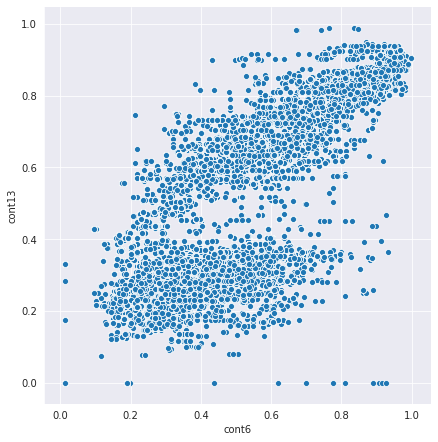

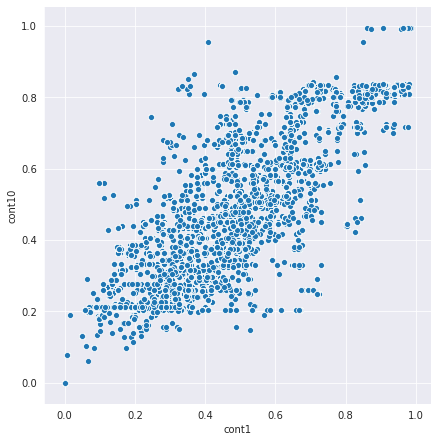

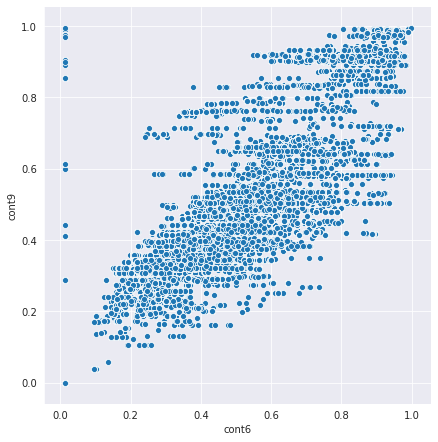

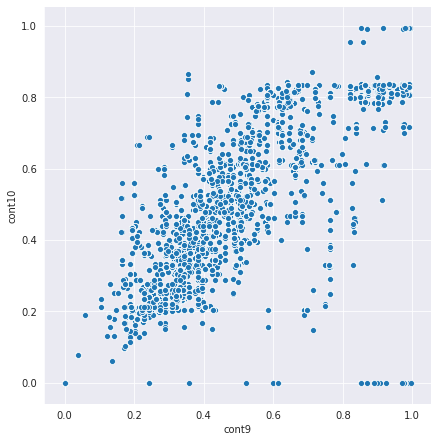

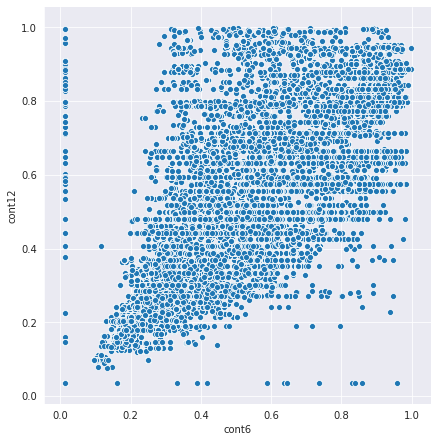

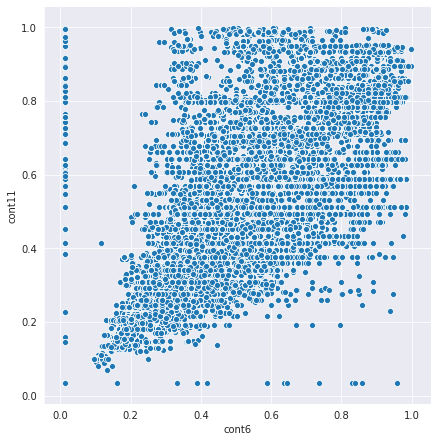

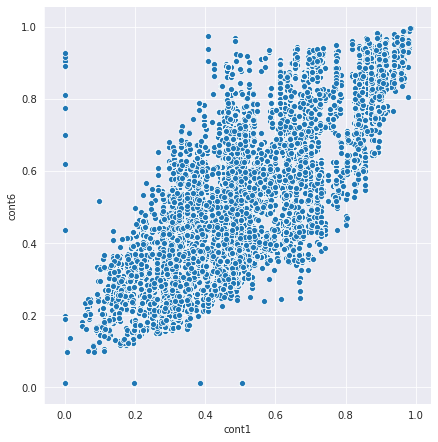

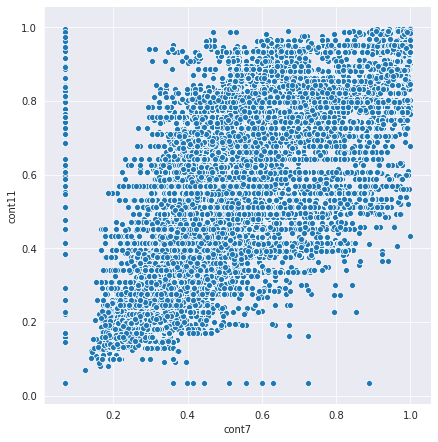

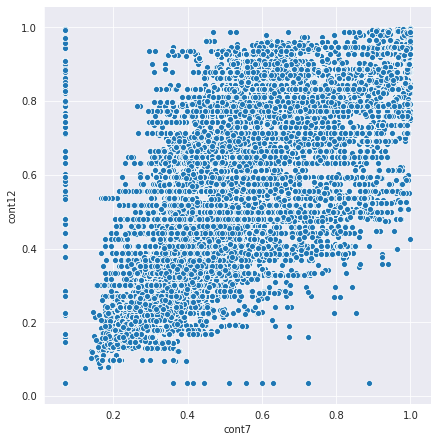

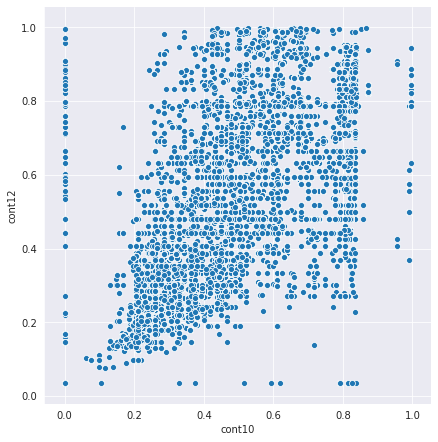

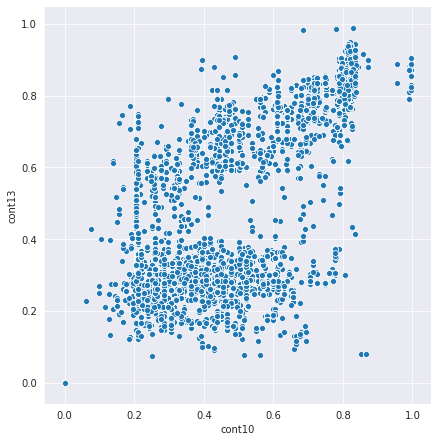

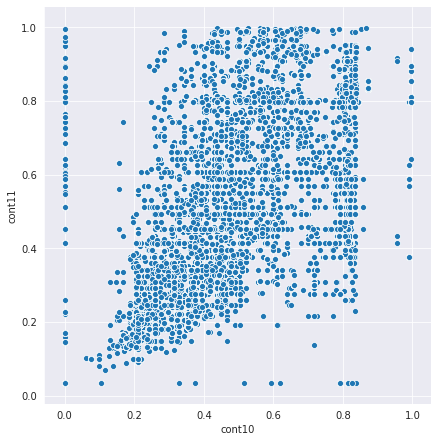

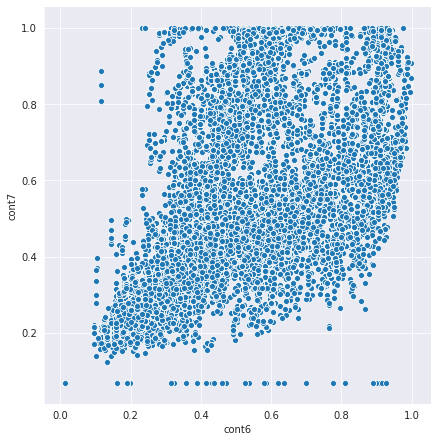

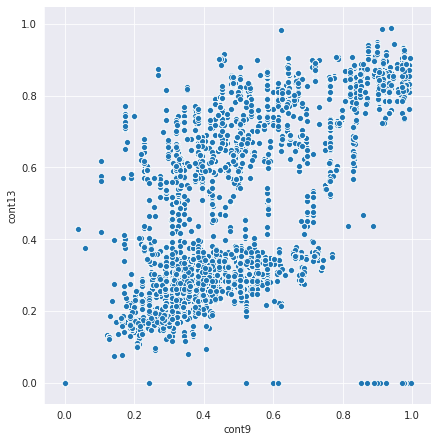

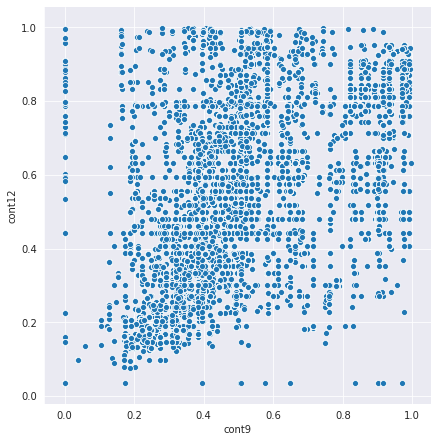

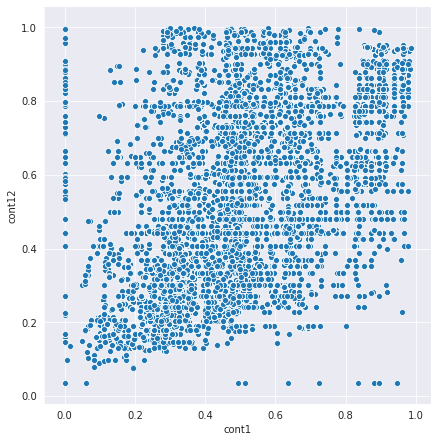

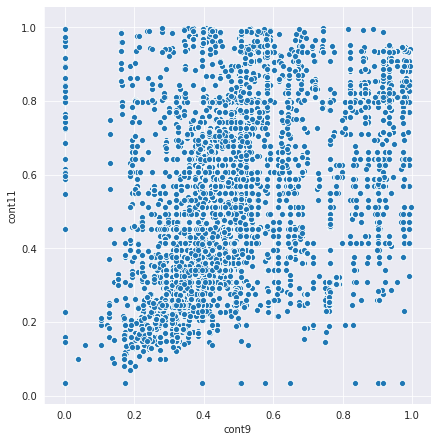

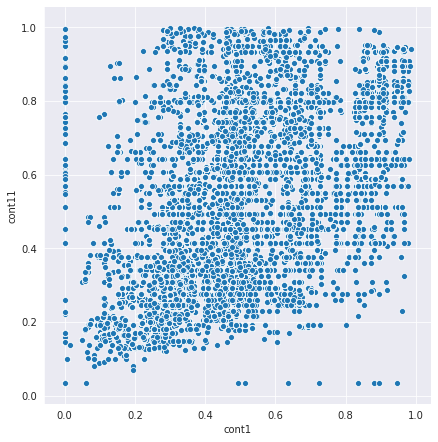

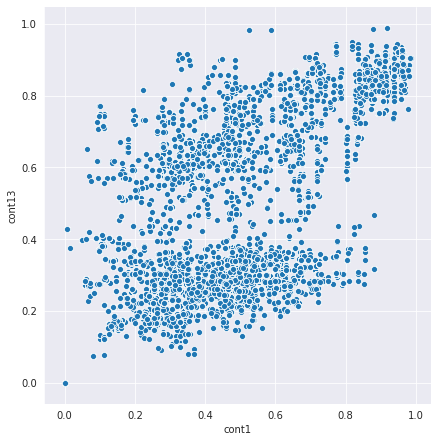

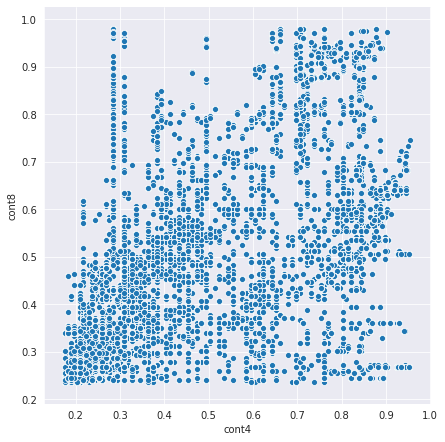

In [24]:
# Scatter plot onl highly correlated pairs
sns.set_style("darkgrid")
for v, i, j in s_corr_list:
    sns.pairplot(train_data, size=6, x_vars=cont_cols[i], y_vars=cont_cols[j])
    plt.show()